In [24]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [25]:
#color blind colors
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [26]:
from DensitiesGenerator import DensityGenerator
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


# Generation du dict mix Gauss/Laplace

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


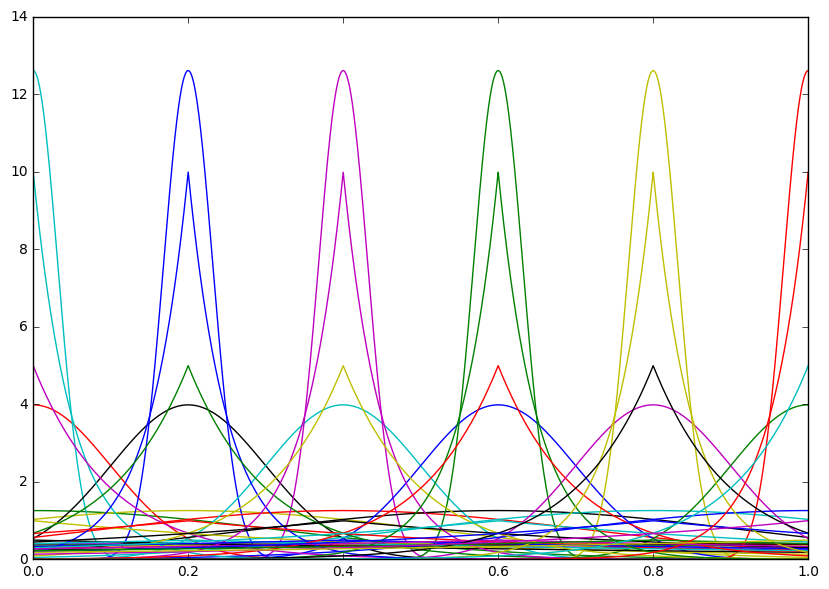

In [27]:
from scipy.stats import multivariate_normal
from scipy.stats import laplace

nodes_gauss = [0, 0.2, 0.4, 0.6, 0.8, 1]
var_list = [1, 10**(-1), 10**(-2), 10**(-3)]
densities = []
for m in nodes_gauss:
    for var in var_list:
        densities.append(multivariate_normal(m, var))
scales =[0.05, 0.1, 0.5, 1]
nodes_lapl = [0, 0.2, 0.4, 0.6, 0.8, 1]

for m in nodes_lapl:
    for scale in scales:
        densities.append(laplace(loc=m, scale=scale))

x = np.linspace(0,1,10000)

fig1, ax1 = plt.subplots(figsize=(10,7))
for d in densities:
    plt.plot(x, d.pdf(x))
plt.legend(loc='upper right')

In [28]:
#test
selected_densities = [np.random.choice(range(len(densities))) for _ in range(8)]
print selected_densities
print len(densities)
from DensitiesGenerator import DensityGenerator
n_points = 10000
n_pdf = 10000
dg = DensityGenerator()

X, pdf, w, sd = dg.gaussian(100, densities=densities, selected_densities=selected_densities)

[3, 45, 42, 33, 14, 16, 31, 31]
48


# Generation des f*

In [29]:
n_pdf = 10000
N = 1000
dg = DensityGenerator(n_pdf=n_pdf)
df = np.zeros([10000,4])

#f* uniform
X_unif, pdf_unif = dg.generate_uniform(n_points=N)

#f* rect
dist_rect = {
    (0,1./5) : 10./7,
    (1./5,2./5) : 5./7,
    (2./5,3./5) : 10./7,
    (3./5,4./5) : 0,
    (4./5,1) : 10./7
}
X_rect, pdf_rect = dg.generate_rect(N, dist_rect)

#f* 5 gaussians, same weights
# mean k/5, var=10^(-4)
var = 10**(-3)
selected_densities_gauss = []
for m in [0.2, 0.4, 0.6, 0.8, 1]:
    selected_densities_gauss.append(multivariate_normal(m, var))
X_gauss, pdf_gauss, _, _ = dg.gaussian(n_points=N, densities=selected_densities_gauss, selected_densities=range(5))

#f* mix gaussian/laplace in dict
selected_densities_lapl_gauss = []
selected_densities_lapl_gauss.append(multivariate_normal(0.2, 10**(-3)))
selected_densities_lapl_gauss.append(multivariate_normal(0.6, 10**(-3)))
selected_densities_lapl_gauss.append(multivariate_normal(0, 10**(-2)))
selected_densities_lapl_gauss.append(laplace(0.4,0.2))
selected_densities_lapl_gauss.append(laplace(0.8,0.1))
X_lapl_gauss, pdf_lapl_gauss, _, _ = dg.gaussian(n_points=N, densities=selected_densities_lapl_gauss, selected_densities=range(5))
print len(pdf_lapl_gauss)
#f* Another with densities not in dict
selected_densities_lapl_gauss = []
selected_densities_lapl_gauss.append(multivariate_normal(0.1, 5*10**(-3)))
selected_densities_lapl_gauss.append(multivariate_normal(0.6, 10**(-3)))
selected_densities_lapl_gauss.append(multivariate_normal(0, 10**(-2)))
selected_densities_lapl_gauss.append(laplace(0.4, 0.1))
selected_densities_lapl_gauss.append(laplace(0.8, 0.1))
selected_densities_lapl_gauss.append(laplace(0.3, 0.1))
selected_densities_lapl_gauss.append(laplace(0.7, 0.1))
X_lapl_gauss_not_dict, pdf_lapl_gauss_not_dict, _, _ = dg.gaussian(n_points=N, densities=selected_densities_lapl_gauss, selected_densities=range(7))


10000


In [30]:
df = np.zeros([n_pdf,5])
df[:,0] = pdf_unif
df[:,1] = pdf_gauss
df[:,2] = pdf_rect
df[:,3] = pdf_lapl_gauss
df[:,4] = pdf_lapl_gauss_not_dict
df = df.T

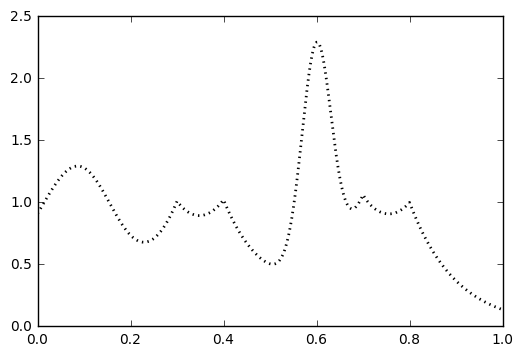

In [31]:
plt.plot(x, df[4], color='black', lw=2, ls=':', label="Gauss Lapl mix Not Dict")


In [32]:
from scipy.integrate import simps
print simps(df[4], np.linspace(0,1,n_pdf))

0.899371372761


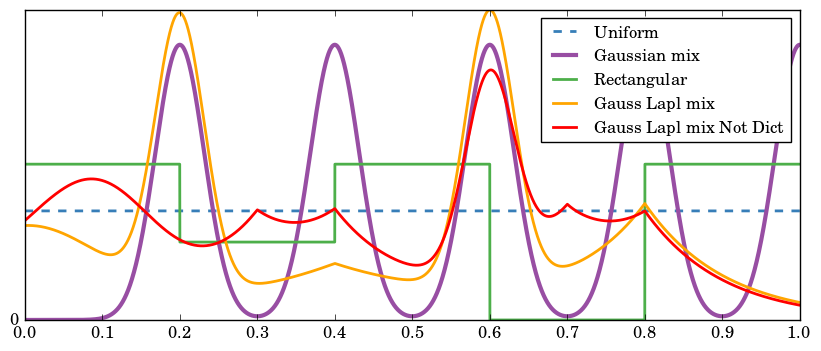

In [33]:
x = np.linspace(0,1,n_pdf)
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
fig1, ax1 = plt.subplots(figsize=(10,4))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 8, 3))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
#plt.plot(x, df[0], color='#377eb8', lw=3, ls='-', label="Uniform")
plt.plot(x, df[0], color='#377eb8', lw=2, ls='--', label="Uniform")
#plt.plot(x, df[1], color='#984ea3', lw=3, ls='-', label="Gaussian mix")
plt.plot(x, df[1], color='#984ea3', lw=3, ls='-', label="Gaussian mix")
#plt.plot(x, df[2], color='#4daf4a', lw=3, ls='-', label="Rectangular")
plt.plot(x, df[2], color='#4daf4a', lw=2, ls='-', label="Rectangular")
plt.plot(x, df[3], color='orange', lw=2, ls='-', label="Gauss Lapl mix")
plt.plot(x, df[4], color='red', lw=2, ls='-', label="Gauss Lapl mix Not Dict")
plt.legend(loc='upper right')
#plt.title(r'\large{Densities $f^*$ considered}')
plt.savefig("../../phd-thesis/TeX_files/densities_f_star.png", dpi=300)
plt.show()

# Tests sur MLE, Adaptive Dantzig and KDE


In [35]:
from algorithm import WeightEstimator

In [37]:
#choice of sample

var = 10**(-3)
selected_densities_gauss = []
for m in [0.2, 0.4, 0.6, 0.8, 1]:
    selected_densities_gauss.append(multivariate_normal(m, var))

i=0
for _ in range(10):
    X_gauss, pdf_gauss, _, _ = dg.gaussian(n_points=N, densities=selected_densities_gauss, selected_densities=range(5))
    X = X_gauss
    pdf = pdf_gauss
    cl = WeightEstimator(densities_dict=densities, select_threshold=10e-8)
    try:
        cl.fit(X)
        estim_weighted_densities=cl.select_densities()
        selected_densities_estim, weights_estim = np.array(zip(*estim_weighted_densities))
        f_estim = np.apply_along_axis(lambda x: weights_estim.dot(np.array([densities[i].pdf(x) for i in selected_densities_estim.astype(int)])), 0, np.linspace(0,1,n_pdf))
    except:
        i+=1
print i
        
    

Combined backtracking failed 0 0 90 0 sigma 1
Combined backtracking failed 0 0 90 0 sigma 1
2


In [75]:
cl = WeightEstimator(densities_dict=densities, select_threshold=10e-8)
cl.fit(X)
estim_weighted_densities=cl.select_densities()
selected_densities_estim, weights_estim = np.array(zip(*estim_weighted_densities))
f_estim = np.apply_along_axis(lambda x: weights_estim.dot(np.array([densities[i].pdf(x) for i in selected_densities_estim.astype(int)])), 0, np.linspace(0,1,n_pdf))


In [63]:
from adaptiveDantzig import AdaptiveDantzigEstimator
ad= AdaptiveDantzigEstimator(densities=densities)
lambda_dantzig = ad.fit(X)
f_estim_dantzig = np.apply_along_axis(lambda x: lambda_dantzig.dot(np.array([d.pdf(x) for d in densities])), 0, np.linspace(0,1,n_pdf))
f_estim_dantzig[f_estim_dantzig<0]=1e-10

KeyboardInterrupt: 

In [64]:
from scipy.stats import gaussian_kde
from pythonABC.hselect import hsj
kernel = gaussian_kde(X, bw_method=hsj(X))
pdf_kde_hsj = kernel.pdf(np.linspace(0,1,10000))
kernel = gaussian_kde(X)
pdf_kde = kernel.pdf(np.linspace(0,1,10000))

KeyboardInterrupt: 

In [65]:
fig, ax = plt.subplots(figsize=(10,10))
#plt.hist(X, bins=100)
x = np.linspace(0,1,10000)
plt.plot(x, pdf, color="r", lw=3)
plt.plot(x, pdf_kde, color="y", lw=3)
plt.plot(x, pdf_kde_hsj, color="purple", lw=3)
plt.plot(x, f_estim, color="g", lw=3)
plt.plot(x, f_estim_dantzig, color="b", lw=3)
plt.show()

KeyboardInterrupt: 

In [66]:
from scipy.stats import entropy
#import scipy.integrate as integrate
#integrate.quad(lambda x: x**2, 0, 1)

print "MLE"
print "KL-div:", entropy(pdf, f_estim)
print "L2 norm", 1./n_pdf*np.linalg.norm(pdf-f_estim,axis=0)**2


MLE
KL-div: 0.00147691856545
L2 norm 0.000285458479492


In [67]:
print "AD"
print "KL-div:", entropy(pdf, f_estim_dantzig)
print "L2 norm", 1./n_pdf*np.linalg.norm(pdf-f_estim_dantzig,axis=0)**2

AD
KL-div: 0.573958714079
L2 norm 0.802274554812


In [68]:
print "KDE"
print "KL-div:", entropy(pdf, pdf_kde)
print "L2 norm", 1./n_pdf*np.linalg.norm(pdf-pdf_kde,axis=0)**2

KDE
KL-div: 0.640466314496
L2 norm 0.88983965159


In [69]:
print "KDE HSJ"
print "KL-div:", entropy(pdf, pdf_kde_hsj)
print "L2 norm", 1./n_pdf*np.linalg.norm(pdf-pdf_kde_hsj,axis=0)**2

KDE HSJ
KL-div: 0.71451293441
L2 norm 0.880571289809


In [47]:
from datetime import datetime
import os
from multiprocessing import Pool
import pickle
import uuid
import numpy as np
from scipy.stats import multivariate_normal
from scipy.stats import laplace
from scipy.integrate import simps
from DensitiesGenerator import DensityGenerator
from scipy.stats import gaussian_kde
from pythonABC.hselect import hsj
from algorithm import WeightEstimator
from adaptiveDantzig import AdaptiveDantzigEstimator

N_PDF = 10000
SELECT_THRESHOLD = 10e-5
FOLDER = str(datetime.now()).split(".")[0].replace(" ", "_").replace(":", ".") + "/"
os.makedirs(FOLDER)

dist_rect = {
    (0,1./5) : 10./7,
    (1./5,2./5) : 5./7,
    (2./5,3./5) : 10./7,
    (3./5,4./5) : 0,
    (4./5,1) : 10./7
}

def gaussian_densities_generator(K, var=10**(-4)):
    #Generate a list of K gaussians reparted in [0,1]
    nodes = np.linspace(0, 1, K)
    return [multivariate_normal(m, var) for m in nodes]

def laplacian_densities_generator(K, scale=0.2):
    #Generate a list of K Laplacians reparted in [0,1]
    nodes = np.linspace(0, 1, K)
    return [laplace(m, scale) for m in nodes]

def normalize_density(f_pdf):
    #return a normalized vector such that the integral is 1
    return f_pdf/simps(f_pdf, np.linspace(0, 1, N_PDF))

def simu_block(X, densities, cl, adapt_dantzig):
    try:
        print "MLE",
        cl.fit(X)
        estim_weighted_densities=cl.select_densities()
        #dantzig estimator
        print "AD",
        lambda_dantzig = adapt_dantzig.fit(X)
    except:
        print "Error: Cannot compute"
        raise 
    #kde with Sheater-Jones bandwith selection method
    print "KDE-SJ",
    kernel = gaussian_kde(X, bw_method=hsj(X))
    pdf_kde_hsj = kernel.pdf(np.linspace(0,1,10000))
    print "KDE"
    kernel = gaussian_kde(X)
    pdf_kde = kernel.pdf(np.linspace(0,1,10000))
    return estim_weighted_densities, lambda_dantzig, pdf_kde, pdf_kde_hsj    

def simu(K, N):
    dg = DensityGenerator(n_pdf= N_PDF)
    cl = WeightEstimator(densities_dict=densities, select_threshold=SELECT_THRESHOLD)
    adapt_dantzig = AdaptiveDantzigEstimator(densities)

    ###############
    #uniform case:#
    ###############
    print "uniform",
    uniform_X, uniform_f_star = dg.generate_uniform(n_points=N)
    uniform_f_star = normalize_density(uniform_f_star)
    try:
        uniform_estim_weighted_densities, uniform_lambda_dantzig, uniform_kde_pdf_hsj, uniform_kde_pdf = simu_block(uniform_X, densities, cl, adapt_dantzig)   
    except:
        return 0

    ###############
    #rect case:#
    ###############
    print "rect",
    rect_X, rect_f_star = dg.generate_rect(N, dist_rect)
    rect_f_star = normalize_density(rect_f_star)
    try:
        rect_estim_weighted_densities, rect_lambda_dantzig, rect_kde_pdf_hsj, rect_kde_pdf = simu_block(rect_X, densities, cl, adapt_dantzig)
    except:
        return 0

    ###############
    #f* 5 gaussians, same weights
    # mean k/5, var=10^(-4)
    ###############
    print "5 gaussians, same weights",
    var = 10**(-3)
    selected_densities_gauss = []
    for m in [0.2, 0.4, 0.6, 0.8, 1]:
        selected_densities_gauss.append(multivariate_normal(m, var))
    gauss_X, gauss_f_star, gauss_weights_star, _ = dg.gaussian(n_points=N, densities=selected_densities_gauss, selected_densities=range(5))
    gauss_f_star = normalize_density(gauss_f_star)
    try:
        gauss_estim_weighted_densities, gauss_lambda_dantzig, gauss_kde_pdf_hsj, gauss_kde_pdf = simu_block(gauss_X, densities, cl, adapt_dantzig)
    except:
        return 0

    ###############
    #f* mix gaussian/laplace in dict
    ###############
    print "f* mix gaussian/laplace in dict",
    selected_densities_lapl_gauss = []
    selected_densities_lapl_gauss.append(multivariate_normal(0.2, 10**(-3)))
    selected_densities_lapl_gauss.append(multivariate_normal(0.6, 10**(-3)))
    selected_densities_lapl_gauss.append(multivariate_normal(0, 10**(-2)))
    selected_densities_lapl_gauss.append(laplace(0.4,0.2))
    selected_densities_lapl_gauss.append(laplace(0.8,0.1))
    lapl_gauss_X, lapl_gauss_f_star, lapl_gauss_weights_star, _ = dg.gaussian(n_points=N, densities=selected_densities_lapl_gauss, selected_densities=range(5))
    lapl_gauss_f_star = normalize_density(lapl_gauss_f_star)
    try:
        lapl_gauss_estim_weighted_densities, lapl_gauss_lambda_dantzig, lapl_gauss_kde_pdf_hsj, lapl_gauss_kde_pdf = simu_block(lapl_gauss_X, densities, cl, adapt_dantzig)
    except:
        return 0
    
    ###############
    #f* Another with densities not in dict
    ###############
    print "f* with densities not in dict",
    selected_densities_lapl_gauss_not_dict = []
    selected_densities_lapl_gauss_not_dict.append(multivariate_normal(0.1, 5*10**(-3)))
    selected_densities_lapl_gauss_not_dict.append(multivariate_normal(0.6, 10**(-3)))
    selected_densities_lapl_gauss_not_dict.append(multivariate_normal(0, 10**(-2)))
    selected_densities_lapl_gauss_not_dict.append(laplace(0.4, 0.1))
    selected_densities_lapl_gauss_not_dict.append(laplace(0.8, 0.1))
    selected_densities_lapl_gauss_not_dict.append(laplace(0.3, 0.1))
    selected_densities_lapl_gauss_not_dict.append(laplace(0.7, 0.1))
    lapl_gauss_not_dict_X, lapl_gauss_not_dict_f_star, lapl_gauss_not_dict_weights_star, _ = dg.gaussian(n_points=N, densities=selected_densities_lapl_gauss_not_dict, selected_densities=range(7))
    lapl_gauss_not_dict_f_star = normalize_density(lapl_gauss_not_dict_f_star)
    try:
        lapl_gauss_not_dict_estim_weighted_densities, lapl_gauss_not_dict_lambda_dantzig, lapl_gauss_not_dict_kde_pdf_hsj, lapl_gauss_not_dict_kde_pdf = simu_block(lapl_gauss_not_dict_X, densities, cl, adapt_dantzig)
    except:
        return 0
    
    print "OK, writing results"
    pickle.dump({"uniform_data": uniform_X,
                 "uniform_weight_vector_estim_lambda":uniform_estim_weighted_densities,
                 "uniform_adapative_dantzig":uniform_lambda_dantzig,
                 "uniform_kde_hsj": uniform_kde_pdf_hsj,
                 "uniform_kde": uniform_kde_pdf,
                 "uniform_f_star": uniform_f_star,

                 "rect_data": rect_X,
                 "rect_weight_vector_estim_lambda":rect_estim_weighted_densities,
                 "rect_adapative_dantzig":rect_lambda_dantzig,
                 "rect_kde_hsj": rect_kde_pdf_hsj,
                 "rect_kde": rect_kde_pdf,
                 "rect_f_star": rect_f_star,

                 "gauss_data": gauss_X,
                 "gauss_weights_star": gauss_weights_star,
                 "gauss_weight_vector_estim_lambda": gauss_estim_weighted_densities,
                 "gauss_adapative_dantzig": gauss_lambda_dantzig,
                 "gauss_f_star": gauss_f_star,
                 "gauss_kde_hsj": gauss_kde_pdf_hsj,
                 "gauss_kde": gauss_kde_pdf,
                 "gauss_selected_densities" : selected_densities_gauss,

                 "lapl_gauss_data": lapl_gauss_X,
                 "lapl_gauss_weights_star": lapl_gauss_weights_star,
                 "lapl_gauss_weight_vector_estim_lambda":lapl_gauss_estim_weighted_densities,
                 "lapl_gauss_adapative_dantzig":lapl_gauss_lambda_dantzig,
                 "lapl_gauss_f_star": lapl_gauss_f_star,
                 "lapl_gauss_kde_hsj": lapl_gauss_kde_pdf_hsj,
                 "lapl_gauss_kde": lapl_gauss_kde_pdf,
                 "lapl_gauss_selected_densities" : selected_densities_lapl_gauss,

                 "lapl_gauss_not_dict_data": lapl_gauss_not_dict_X,
                 "lapl_gauss_not_dict_weights_star": lapl_gauss_not_dict_weights_star,
                 "lapl_gauss_not_dict_weight_vector_estim_lambda": lapl_gauss_not_dict_estim_weighted_densities,
                 "lapl_gauss_not_dict_adapative_dantzig":lapl_gauss_not_dict_lambda_dantzig,
                 "lapl_gauss_not_dict_f_star": lapl_gauss_not_dict_f_star,
                 "lapl_gauss_not_dict_kde_hsj": lapl_gauss_not_dict_kde_pdf_hsj,
                 "lapl_gauss_not_dict_kde": lapl_gauss_not_dict_kde_pdf,
                 "lapl_gauss_not_dict_selected_densities" : selected_densities_lapl_gauss_not_dict,
                 
                 "densities" : densities,
                 "N" : N
             }, open(FOLDER +
                     "res_" + "K" + str(K) + "N" + str(N) +"_"+ str(uuid.uuid4()), "wb"))
    return 1

In [ ]:
simu(0,1000)

uniform MLE AD